- 모두의 연구소 풀잎스쿨 - Deep Learning for Anomaly Detection 논문 리뷰 4주차 발표 코드

Paper: [Deep One-Class Classification](http://data.bit.uni-bonn.de/publications/ICML2018.pdf)

아래 코드를 참고
- [PyTorch Implementation of Deep SVDD](https://github.com/lukasruff/Deep-SVDD-PyTorch)
- [[바람돌이/딥러닝] Deep SVDD 논문 및 코드 리뷰](https://blog.naver.com/PostView.nhn?blogId=winddori2002&logNo=222142873877&categoryNo=32&parentCategoryNo=1&viewDate=&currentPage=1&postListTopCurrentPage=1&from=postView)

# Import Libs

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import random
import matplotlib.pyplot as plt

import os
import numpy as np
import sys

In [2]:
# version check
torch.__version__

'1.1.0'

In [3]:
# version check
sys.version_info

sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)

In [4]:
cwd = os.getcwd() # get current path

In [5]:
# device setting
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [6]:
# for reproducibility
random.seed(1)
torch.manual_seed(1)
if device == 'cuda':
    torch.cuda.manual_seed_all(1)

# MNIST Data Load

In [7]:
from lib.mnist import *

In [8]:
mymnist = MyMNIST()

In [9]:
mymnist.train_data_loader.batch_size # batch size

128

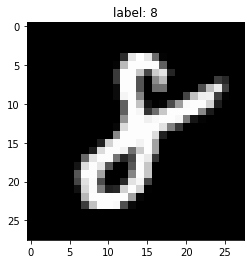

In [10]:
# check mnist data
for X, Y in mymnist.train_data_loader:
    r = random.randint(0, mymnist.train_data_loader.batch_size)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    ax.imshow(X[r].reshape(28,28), cmap = 'gray')
    ax.set_title('label: {}'.format(Y[r]))
    plt.show()
    break
    

# Autoencoder

In [11]:
from lib.networks import *

In [12]:
autoencoder = AE().to(device)

In [13]:
autoencoder

AE(
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv1): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
  (bn1): BatchNorm2d(8, eps=0.0001, momentum=0.1, affine=False, track_running_stats=True)
  (conv2): Conv2d(8, 4, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
  (bn2): BatchNorm2d(4, eps=0.0001, momentum=0.1, affine=False, track_running_stats=True)
  (fc1): Linear(in_features=196, out_features=2, bias=False)
  (deconv1): ConvTranspose2d(2, 4, kernel_size=(7, 7), stride=(1, 1), bias=False)
  (bn3): BatchNorm2d(4, eps=0.0001, momentum=0.1, affine=False, track_running_stats=True)
  (deconv2): ConvTranspose2d(4, 8, kernel_size=(5, 5), stride=(1, 1), padding=(3, 3), bias=False)
  (bn4): BatchNorm2d(8, eps=0.0001, momentum=0.1, affine=False, track_running_stats=True)
  (deconv3): ConvTranspose2d(8, 1, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
)

check weights before training

In [14]:
autoencoder.conv1.weight.data[0] # init weights

tensor([[[-0.0451,  0.1711,  0.1526,  0.1388, -0.0555],
         [ 0.1929, -0.0180, -0.1085, -0.1262,  0.1290],
         [-0.0484,  0.0050,  0.0810,  0.1887,  0.1327],
         [-0.0088,  0.0123, -0.0187,  0.1024, -0.1708],
         [ 0.0338, -0.1920, -0.0759,  0.0942, -0.1710]]], device='cuda:0')

In [15]:
epochs = 50
learning_rate = 1e-3

In [16]:
criterion = nn.MSELoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=learning_rate)

In [17]:
%%time
autoencoder.train() # train setting

total_batch = len(mymnist.train_data_loader)
print('Learning started. It takes sometime.')
for epoch in range(epochs):
    avg_cost = 0

    for X, Y in mymnist.train_data_loader:
        X = X.to(device)

        optimizer.zero_grad()
        X_hat = autoencoder(X)
        cost = criterion(X_hat, X)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

print('Learning Finished!')

Learning started. It takes sometime.
[Epoch:    1] cost = 0.066141434
[Epoch:    2] cost = 0.0564479232
[Epoch:    3] cost = 0.0523669161
[Epoch:    4] cost = 0.051174663
[Epoch:    5] cost = 0.0504480004
[Epoch:    6] cost = 0.0500795729
[Epoch:    7] cost = 0.0497360826
[Epoch:    8] cost = 0.049522765
[Epoch:    9] cost = 0.049303513
[Epoch:   10] cost = 0.049112346
[Epoch:   11] cost = 0.0490177087
[Epoch:   12] cost = 0.0489001237
[Epoch:   13] cost = 0.0487799607
[Epoch:   14] cost = 0.0487048924
[Epoch:   15] cost = 0.0486033224
[Epoch:   16] cost = 0.0485429503
[Epoch:   17] cost = 0.0484569557
[Epoch:   18] cost = 0.0483135283
[Epoch:   19] cost = 0.0482614748
[Epoch:   20] cost = 0.0482227542
[Epoch:   21] cost = 0.0481794551
[Epoch:   22] cost = 0.0481367335
[Epoch:   23] cost = 0.0480461977
[Epoch:   24] cost = 0.0480122715
[Epoch:   25] cost = 0.0479152128
[Epoch:   26] cost = 0.0478815772
[Epoch:   27] cost = 0.0478753634
[Epoch:   28] cost = 0.0478442684
[Epoch:   29] co

check weights after training

In [18]:
autoencoder.conv1.weight.data[0]

tensor([[[ 0.0489, -0.0563,  0.0444,  0.1595,  0.4283],
         [ 0.2519,  0.0984,  0.0740,  0.0771,  0.0715],
         [-0.1297,  0.0401, -0.0581,  0.1271,  0.0917],
         [-0.3566,  0.0901, -0.0082,  0.3378, -0.2145],
         [ 0.1030, -0.0639,  0.0480,  0.3450,  0.0296]]], device='cuda:0')

## Test Autoencoder model

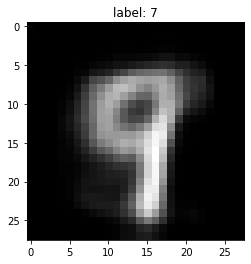

In [19]:
with torch.no_grad():
    autoencoder.eval()
    for data, Y in mymnist.test_data_loader:
        X, labels = data, Y
        X = X.to(device)
        
        r = random.randint(0, mymnist.test_data_loader.batch_size)
        X_hat = autoencoder(X[r].view(1, 1, 28, 28))
        
 
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)

        ax.imshow(X_hat.cpu().reshape(28,28), cmap = 'gray')
        ax.set_title('label: {}'.format(labels[r]))
        plt.show()

        break

# DeepSVDD Network

In [20]:
deep_svdd = DeepSVDDNet(autoencoder)

In [21]:
deep_svdd

DeepSVDDNet(
  (net): AE(
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv1): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (bn1): BatchNorm2d(8, eps=0.0001, momentum=0.1, affine=False, track_running_stats=True)
    (conv2): Conv2d(8, 4, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (bn2): BatchNorm2d(4, eps=0.0001, momentum=0.1, affine=False, track_running_stats=True)
    (fc1): Linear(in_features=196, out_features=2, bias=False)
    (deconv1): ConvTranspose2d(2, 4, kernel_size=(7, 7), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(4, eps=0.0001, momentum=0.1, affine=False, track_running_stats=True)
    (deconv2): ConvTranspose2d(4, 8, kernel_size=(5, 5), stride=(1, 1), padding=(3, 3), bias=False)
    (bn4): BatchNorm2d(8, eps=0.0001, momentum=0.1, affine=False, track_running_stats=True)
    (deconv3): ConvTranspose2d(8, 1, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=F

check weights after update

In [22]:
deep_svdd.net.conv1.weight.data[0]

tensor([[[ 0.0489, -0.0563,  0.0444,  0.1595,  0.4283],
         [ 0.2519,  0.0984,  0.0740,  0.0771,  0.0715],
         [-0.1297,  0.0401, -0.0581,  0.1271,  0.0917],
         [-0.3566,  0.0901, -0.0082,  0.3378, -0.2145],
         [ 0.1030, -0.0639,  0.0480,  0.3450,  0.0296]]], device='cuda:0')

In [23]:
from lib.DeepSVDDTrainer import *

In [24]:
deep_svdd_trainer = DeepSVDDTrainer(deep_svdd, device)

In [25]:
deep_svdd_trainer.init_center_c(mymnist.train_data_loader, device)

tensor([1.9395, 2.3634], device='cuda:0')

In [26]:
deep_svdd_trainer.c.shape

torch.Size([2])

In [27]:
normal_class = 1

In [28]:
deep_svdd_trainer.train(normal_class, mymnist.train_data_loader, device, epochs = epoch)

[Epoch:    1] cost = 1.25334231
[Epoch:    2] cost = 1.00001633
[Epoch:    3] cost = 1.0
[Epoch:    4] cost = 1.00001722
[Epoch:    5] cost = 1.00064851
[Epoch:    6] cost = 1.0
[Epoch:    7] cost = 1.0
[Epoch:    8] cost = 1.0
[Epoch:    9] cost = 1.0
[Epoch:   10] cost = 1.0
[Epoch:   11] cost = 0.0756255521
[Epoch:   12] cost = 0.029896037
[Epoch:   13] cost = 0.0286028959
[Epoch:   14] cost = 0.027149302
[Epoch:   15] cost = 0.0213575961
[Epoch:   16] cost = 0.0177839118
[Epoch:   17] cost = 0.0183111101
[Epoch:   18] cost = 0.0156399721
[Epoch:   19] cost = 0.0169690013
[Epoch:   20] cost = 0.0138387392
[Epoch:   21] cost = 0.0143739799
[Epoch:   22] cost = 0.0155412432
[Epoch:   23] cost = 0.0129436509
[Epoch:   24] cost = 0.0116090702
[Epoch:   25] cost = 0.00960160386
[Epoch:   26] cost = 0.011669184
[Epoch:   27] cost = 0.0109421279
[Epoch:   28] cost = 0.0106433686
[Epoch:   29] cost = 0.0075805597
[Epoch:   30] cost = 0.0085206778
[Epoch:   31] cost = 0.00818718361
[Epoch:  

(tensor(0.0333, device='cuda:0'), tensor([1.9395, 2.3634], device='cuda:0'))

In [29]:
deep_svdd_trainer.R

tensor(0.0333, device='cuda:0')

In [30]:
deep_svdd_trainer.c

tensor([1.9395, 2.3634], device='cuda:0')

In [31]:
label_score = deep_svdd_trainer.test(normal_class , mymnist.test_data_loader, device)

# AUC 계산

In [32]:
labels, scores, rep_dims = zip(*label_score)
labels = np.array(labels)
scores = np.array(scores)
rep_dims = np.array(rep_dims)

In [33]:
for_auc_label = list(map(lambda x: 0 if x==normal_class else 1, labels))

In [34]:
import pandas as pd

In [35]:
R_in = scores[np.where(labels==normal_class)[0]]
R_out = scores[np.where(labels!=normal_class)[0]]

# AUC 결과 그래프 출력

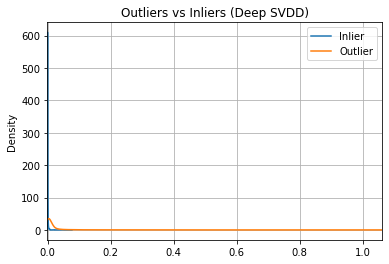

In [36]:
in_ = pd.DataFrame(R_in, columns=['Inlier'])
out_ = pd.DataFrame(R_out, columns=['Outlier'])


fig, ax = plt.subplots()
in_.plot.kde(ax=ax, legend=True, title='Outliers vs Inliers (Deep SVDD)')
out_.plot.kde(ax=ax, legend=True)
plt.xlim(in_.min()[0], out_.max()[0])
ax.grid(axis='x')
ax.grid(axis='y')

plt.show()

In [37]:
in_.describe()

,Inlier
count,1133.000000
mean,-0.000162
std,0.001857
min,-0.001107
25%,-0.000702
50%,-0.000434
75%,-0.000046
max,0.050899


In [38]:
out_.describe()

,Outlier
count,8851.000000
mean,0.017933
std,0.052021
min,-0.001108
25%,0.000479
50%,0.003438
75%,0.011113
max,1.061102


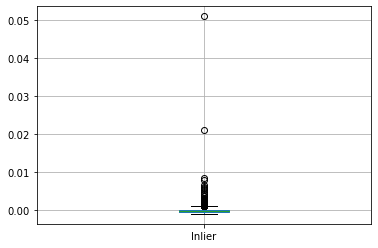

In [39]:
in_.boxplot()
plt.show()

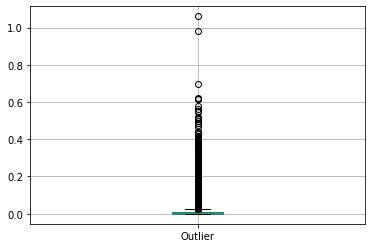

In [40]:
out_.boxplot()
plt.show()

In [41]:
deep_svdd_trainer.c

tensor([1.9395, 2.3634], device='cuda:0')

In [42]:
c = deep_svdd_trainer.c.cpu().numpy()

In [43]:
c

array([1.9394965, 2.3633525], dtype=float32)

In [44]:
rep_dims.shape

(9984, 2)

In [45]:
labels.shape

(9984,)

# deep svdd 출력 2dim 그래프로 나타내기

In [46]:
df = pd.DataFrame({'x': rep_dims[:, 0], 'y': rep_dims[:, 0], 'label': labels==normal_class})

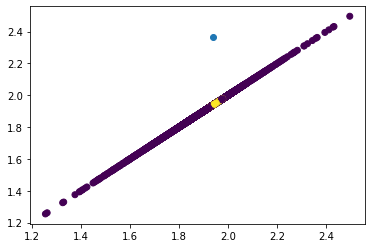

In [47]:
plt.scatter(df['x'],df['y'],c=df['label'])
plt.scatter(c[0], c[1])
plt.show()


## One Sample test

In [48]:
x= mymnist.mnist_train.data[2].to(device) 

In [49]:
x.shape

torch.Size([28, 28])

In [50]:
y = mymnist.mnist_train.targets[2]

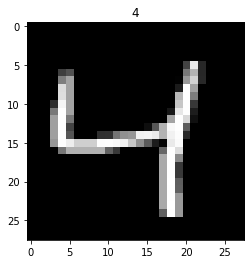

In [51]:
plt.imshow(x.cpu(), cmap='gray')
plt.title(str(y.numpy()))
plt.show()

In [52]:
x = x.view(-1, 1,  28, 28).to(device)
x = x.float() / 255.

In [53]:
deep_svdd_trainer.R

tensor(0.0333, device='cuda:0')

In [54]:
with torch.no_grad():
    outputs = deep_svdd_trainer.net(x)
    print(outputs)

tensor([[1.8390, 2.2355]], device='cuda:0')


In [55]:
dist = torch.sum((outputs - deep_svdd_trainer.c) ** 2, dim=1)
dist

tensor([0.0264], device='cuda:0')

In [56]:
scores = dist - deep_svdd_trainer.R ** 2
scores

tensor([0.0253], device='cuda:0')